# Imports

In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential , Model
from sklearn.metrics import classification_report , confusion_matrix
from tensorflow.keras.layers import Dense
sns.set_theme(style='darkgrid',palette='rainbow')
plt.rcParams['figure.figsize'] = (15,10)

# Data

In [107]:
df = pd.read_csv('./forestfires.csv')
df

month  day  FFMC    DMC     DC   ISI  ...  monthmar  monthmay  monthnov  monthoct  monthsep  size_category
0     mar  fri  86.2   26.2   94.3   5.1  ...         1         0         0         0         0          small
1     oct  tue  90.6   35.4  669.1   6.7  ...         0         0         0         1         0          small
2     oct  sat  90.6   43.7  686.9   6.7  ...         0         0         0         1         0          small
3     mar  fri  91.7   33.3   77.5   9.0  ...         1         0         0         0         0          small
4     mar  sun  89.3   51.3  102.2   9.6  ...         1         0         0         0         0          small
..    ...  ...   ...    ...    ...   ...  ...       ...       ...       ...       ...       ...            ...
512   aug  sun  81.6   56.7  665.6   1.9  ...         0         0         0         0         0          large
513   aug  sun  81.6   56.7  665.6   1.9  ...         0         0         0         0         0          large
514   aug  sun  81.6   56.7  665.6   1.9  ...         0         0         0         0         0          large
515   aug  sat  94.4  146.0  614.7  11.3  ...         0         0         0         0         0          small
516   nov  tue  79.5    3.0  106.7   1.1  ...         0         0         1         0         0          small

[517 rows x 31 columns]

# EDA

## check for null and duplicates

In [108]:
df.isna().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [109]:
df[df.duplicated()]

month  day  FFMC    DMC     DC   ISI  ...  monthmar  monthmay  monthnov  monthoct  monthsep  size_category
53    aug  wed  92.1  111.2  654.1   9.6  ...         0         0         0         0         0          small
100   aug  sun  91.4  142.4  601.4  10.6  ...         0         0         0         0         0          small
215   mar  sat  91.7   35.8   80.8   7.8  ...         1         0         0         0         0          large
303   jun  fri  91.1   94.1  232.1   7.1  ...         0         0         0         0         0          small
426   aug  thu  91.6  248.4  753.8   6.3  ...         0         0         0         0         0          small
461   aug  sat  93.7  231.1  715.1   8.4  ...         0         0         0         0         0          small
501   aug  tue  96.1  181.1  671.2  14.3  ...         0         0         0         0         0          small
508   aug  fri  91.0  166.9  752.6   7.1  ...         0         0         0         0         0          small

[8 rows x 31 columns]

In [110]:
df.drop(index=list(df[df.duplicated()].index),inplace=True)

**Drop month and day feature since it is already one hot encoded**

In [111]:
df.drop(columns=['month','day'],inplace=True)

In [112]:
df.describe()

FFMC         DMC          DC         ISI  ...    monthmay    monthnov    monthoct    monthsep
count  509.000000  509.000000  509.000000  509.000000  ...  509.000000  509.000000  509.000000  509.000000
mean    90.618075  110.235756  547.787623    9.023576  ...    0.003929    0.001965    0.029470    0.337917
std      5.555527   63.804112  248.196222    4.585083  ...    0.062622    0.044324    0.169285    0.473466
min     18.700000    1.100000    7.900000    0.000000  ...    0.000000    0.000000    0.000000    0.000000
25%     90.200000   62.300000  437.700000    6.400000  ...    0.000000    0.000000    0.000000    0.000000
50%     91.600000  108.300000  664.200000    8.400000  ...    0.000000    0.000000    0.000000    0.000000
75%     92.900000  141.300000  713.900000   11.000000  ...    0.000000    0.000000    0.000000    1.000000
max     96.200000  291.300000  860.600000   56.100000  ...    1.000000    1.000000    1.000000    1.000000

[8 rows x 28 columns]

# Viz

<Axes: xlabel='size_category', ylabel='count'>

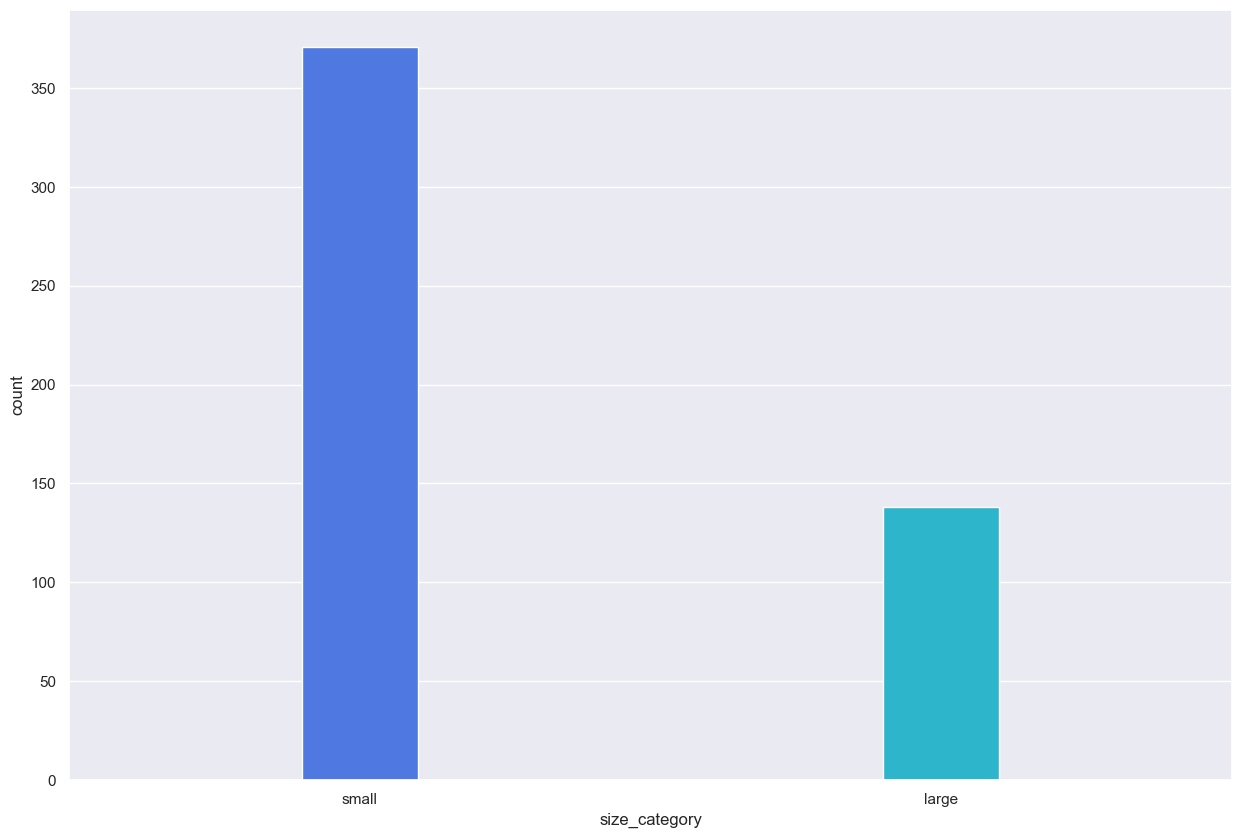

In [113]:
sns.countplot(data=df,x='size_category',width=0.2)

In [114]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

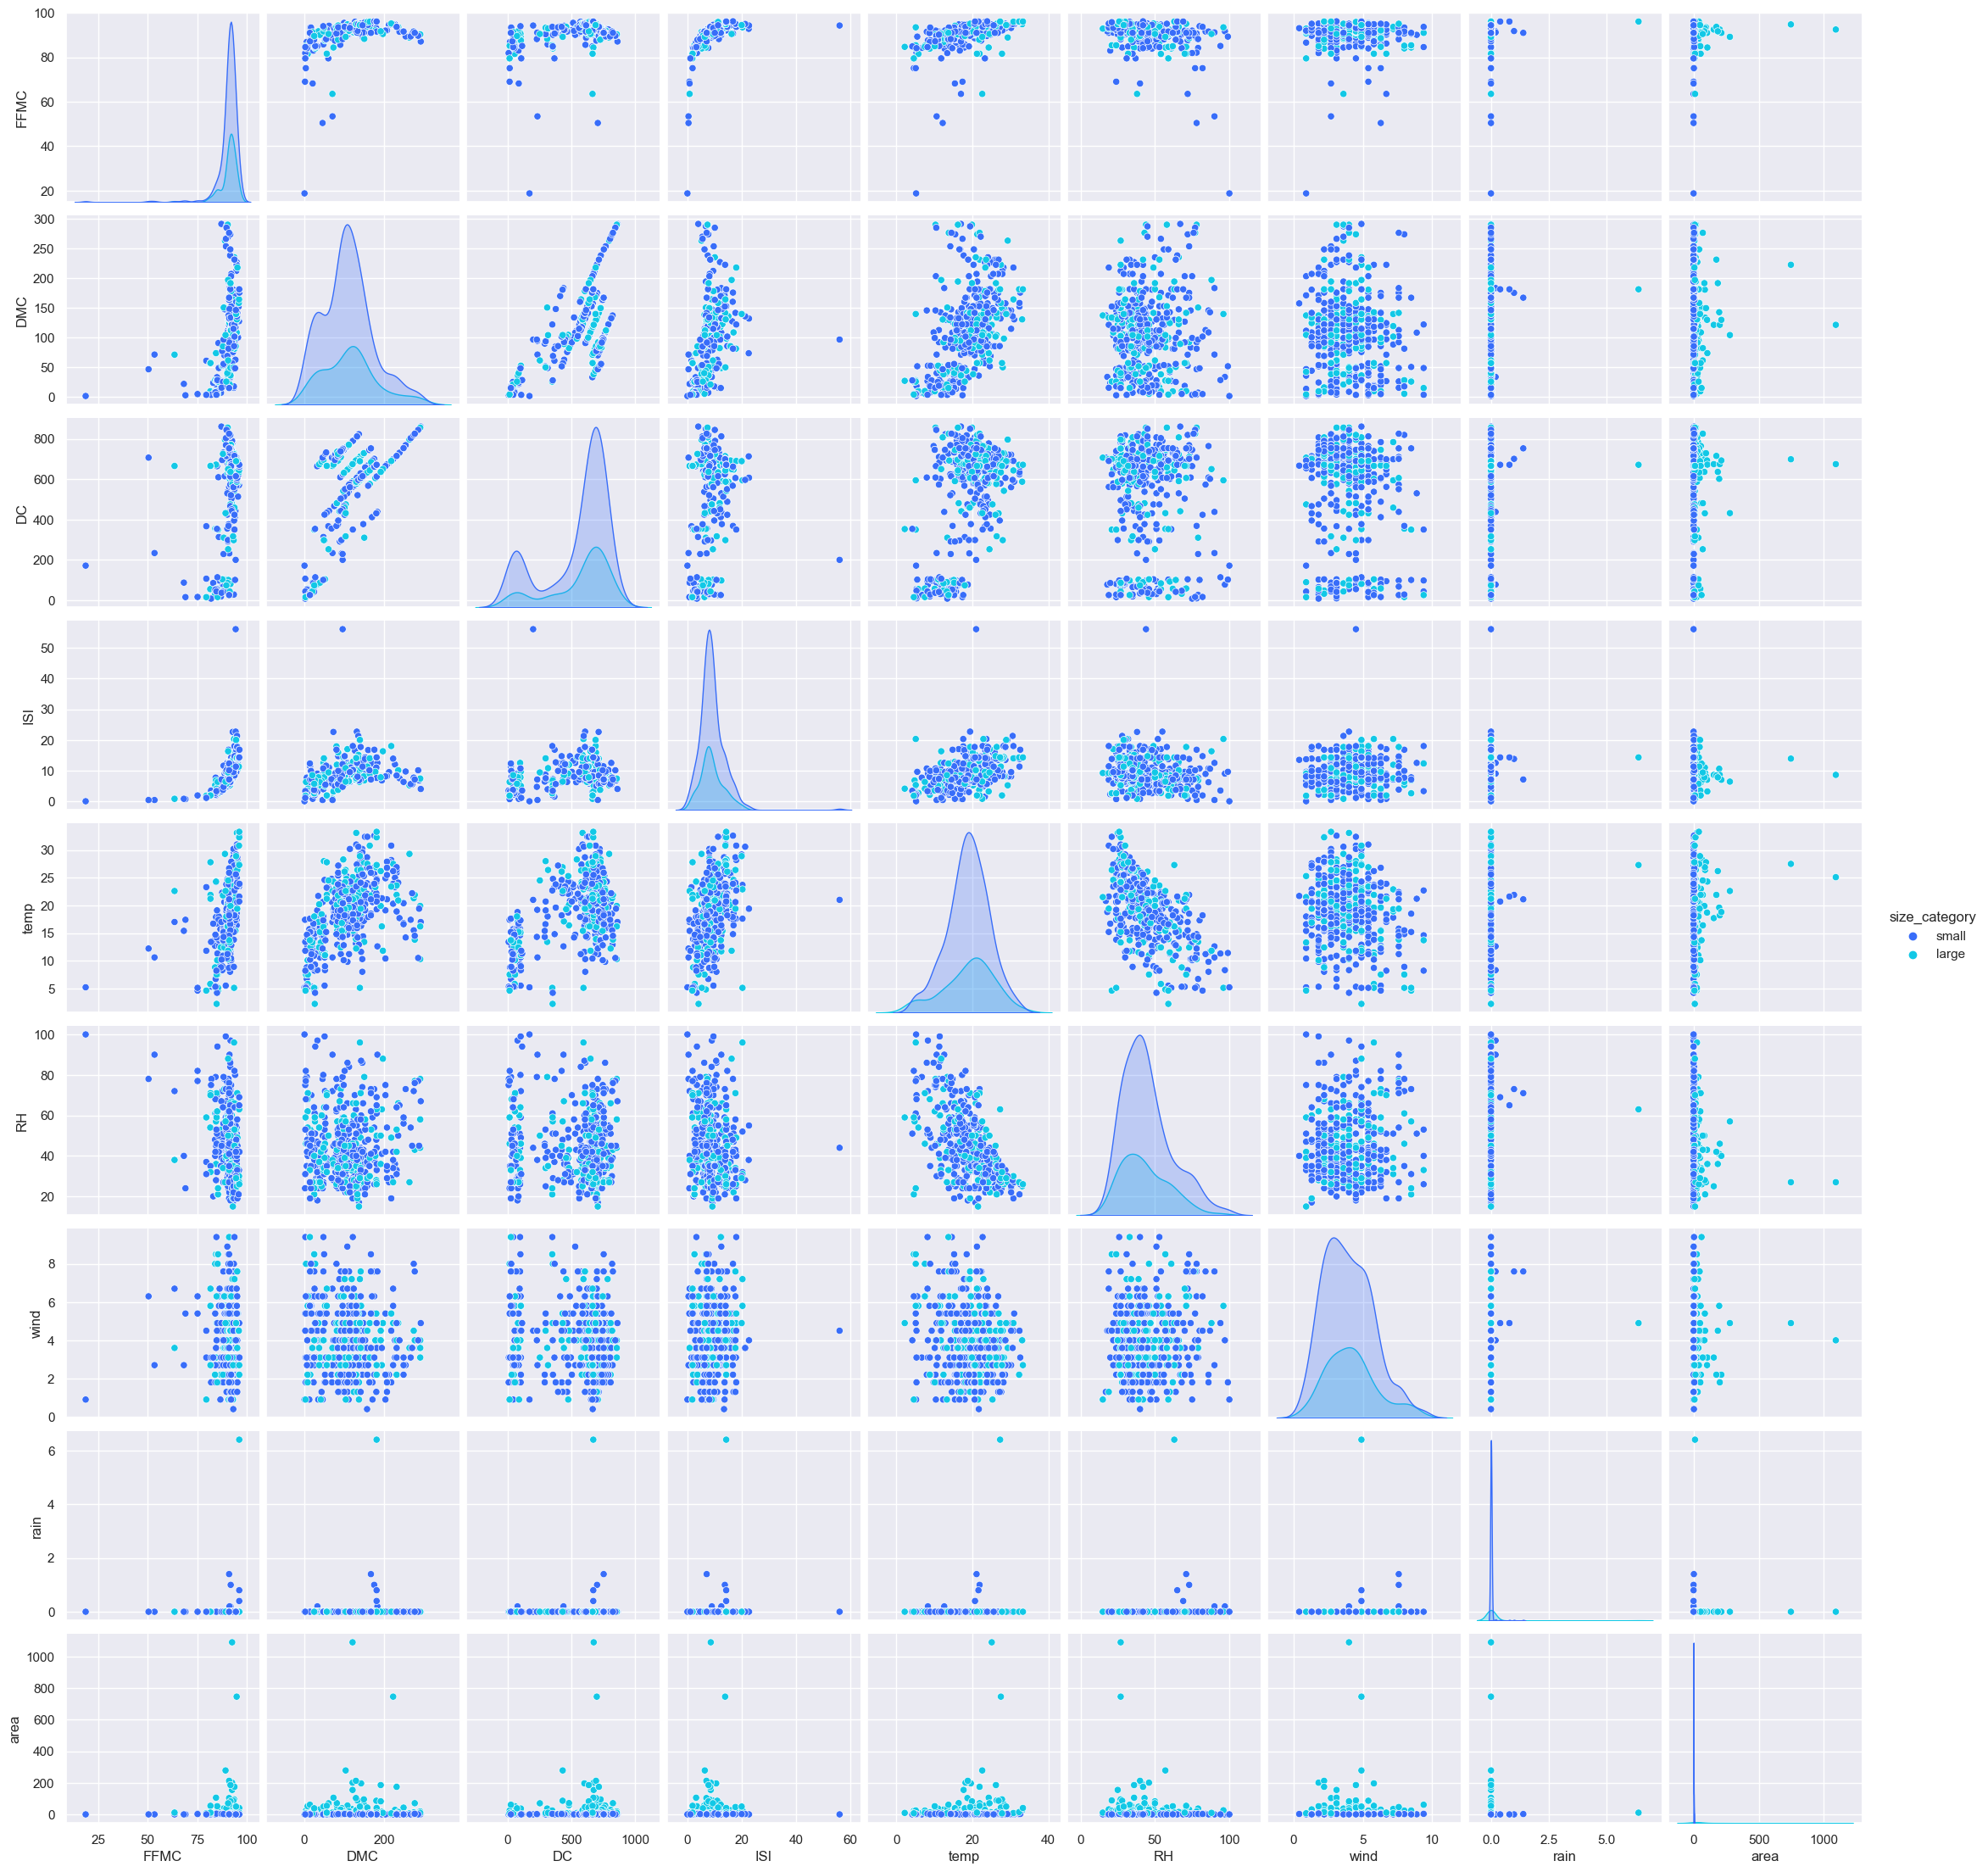

In [115]:
sns.pairplot(data=df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area','size_category']],hue='size_category')

# DataPreprocessing

In [116]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split

In [117]:
X = df.drop('size_category',axis=1)
Y = df['size_category']

In [118]:
lbenc = LabelEncoder()
Y = lbenc.fit_transform(Y)

In [119]:
std = StandardScaler()
scaled = std.fit_transform(X)

In [120]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled,Y,test_size=0.2,random_state=42)

# Model

In [121]:
def plot_history(hist):
    hist = hist.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = len(acc)
    
    plt.subplot(1,2,1)
    plt.plot(range(epochs),loss,label='loss')
    plt.plot(range(epochs),val_loss,label='val_loss')
    plt.legend()
    plt.tight_layout()
    plt.subplot(1,2,2)
    plt.plot(range(epochs),acc,label='accuracy')
    plt.plot(range(epochs),val_acc,label='val_accuracy')
    plt.tight_layout()
    plt.legend()
    plt.show()
    

# Baseline Model

In [122]:
x_in = tf.keras.Input(shape=(28))
x = tf.keras.layers.Dense(16,activation='relu')(x_in)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = Model(inputs=[x_in],outputs=[x])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_36 (Dense)            (None, 16)                464       
                                                                 
 dense_37 (Dense)            (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [124]:
history = model.fit(xtrain,ytrain,batch_size=16,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
26/26 [==============================] - 1s 16ms/step - loss: 1.3965 - accuracy: 0.2801 - val_loss: 1.2329 - val_accuracy: 0.3333
Epoch 2/50
26/26 [==============================] - 0s 8ms/step - loss: 1.1880 - accuracy: 0.3219 - val_loss: 1.0738 - val_accuracy: 0.3725
Epoch 3/50
26/26 [==============================] - 0s 7ms/step - loss: 1.0195 - accuracy: 0.3661 - val_loss: 0.9444 - val_accuracy: 0.4118
Epoch 4/50
26/26 [==============================] - 0s 7ms/step - loss: 0.8881 - accuracy: 0.4595 - val_loss: 0.8516 - val_accuracy: 0.5000
Epoch 5/50
26/26 [==============================] - 0s 7ms/step - loss: 0.7878 - accuracy: 0.5332 - val_loss: 0.7793 - val_accuracy: 0.5098
Epoch 6/50
26/26 [==============================] - 0s 7ms/step - loss: 0.7130 - accuracy: 0.6143 - val_loss: 0.7291 - val_accuracy: 0.5098
Epoch 7/50
26/26 [==============================] - 0s 7ms/step - loss: 0.6602 - accuracy: 0.6536 - val_loss: 0.6895 - val_accuracy: 0.5882
Epoch 8/50
26/26 [=

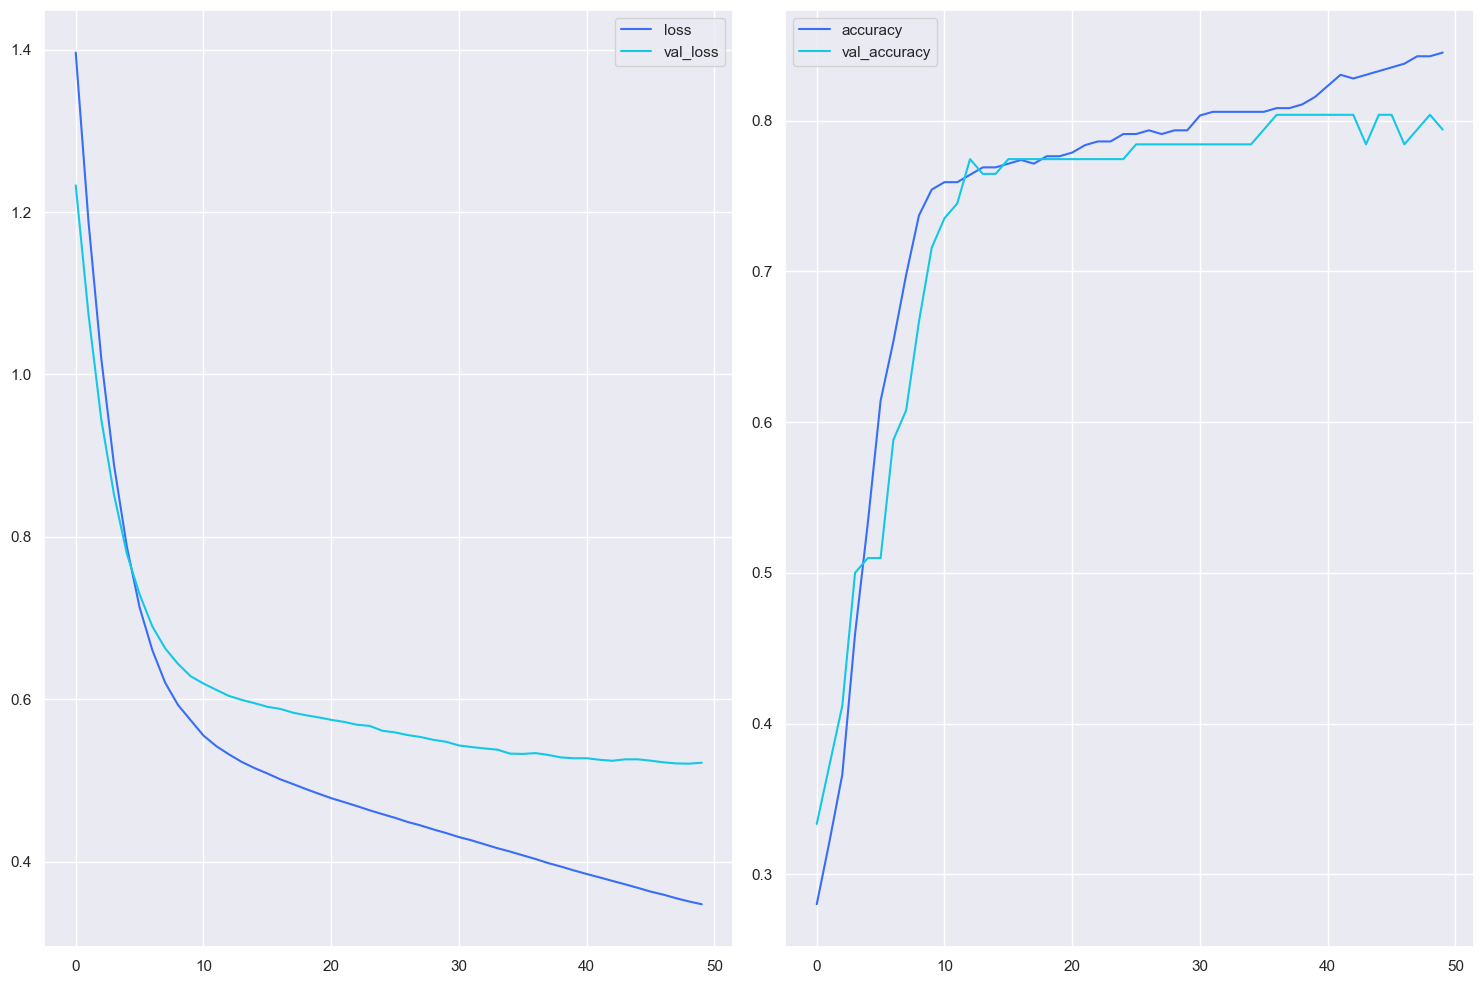

In [125]:
plot_history(history)

In [126]:
ypred = model.predict(xtest)
ypred = ypred > 0.5

4/4 [==============================] - 0s 2ms/step


In [127]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.38      0.51        29
           1       0.80      0.96      0.87        73

    accuracy                           0.79       102
   macro avg       0.79      0.67      0.69       102
weighted avg       0.79      0.79      0.77       102



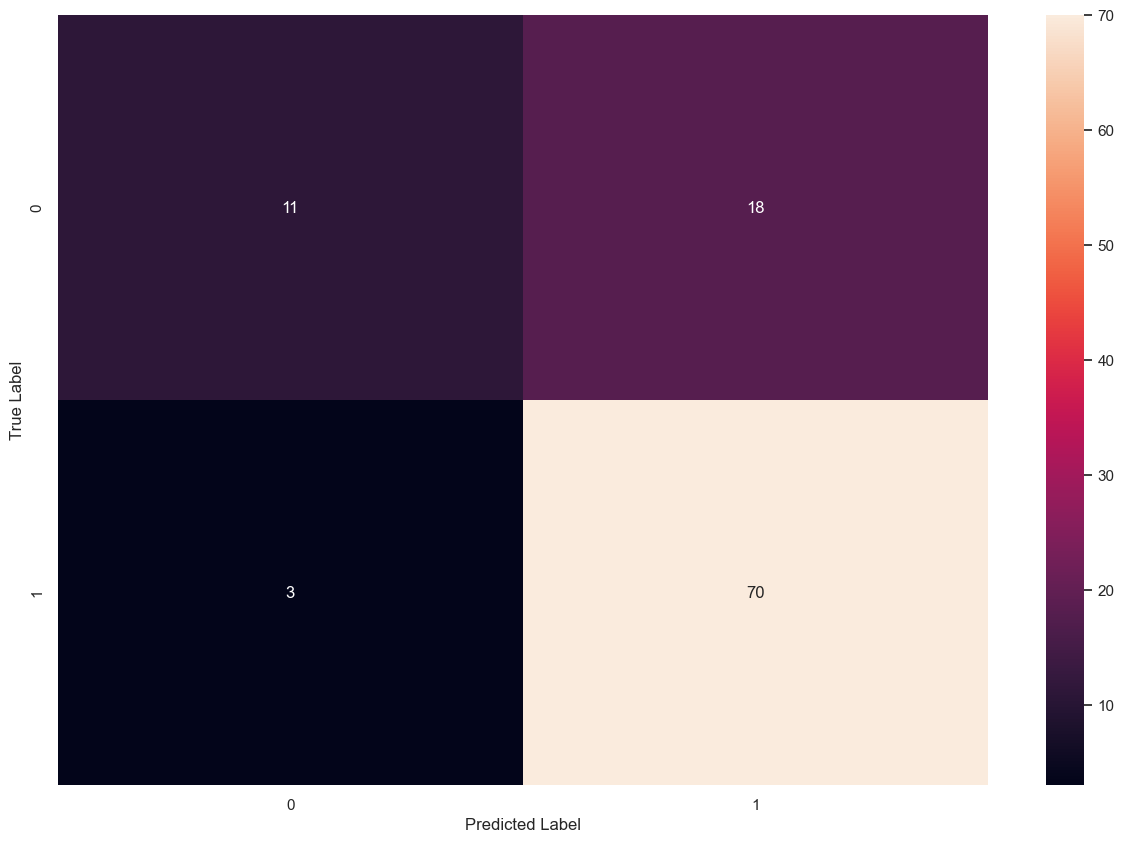

In [128]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Hyperparameter tuning

In [129]:
import keras_tuner as kt

In [130]:
def hyper(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers',min_value = 1, max_value=10)):
        if counter == 0:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                           activation = hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
                           input_dim=28))
            counter = counter + 1
        else:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                           activation=hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh'])))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer= hp.Choice('Optimizer',values=['adam','rmsprop','sgd']),
                     loss = 'binary_crossentropy',metrics = 'accuracy')
    return model

In [131]:
tuner = kt.RandomSearch(hyper,
                       objective='val_accuracy',
                        overwrite=True,
                       max_trials=5
                       )
tuner.search(xtrain,ytrain,epochs = 10 , validation_data=(xtest,ytest))

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.7156862616539001

Best val_accuracy So Far: 0.7941176295280457
Total elapsed time: 00h 00m 32s
INFO:tensorflow:Oracle triggered exit


In [132]:
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3712      
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 8)                 7

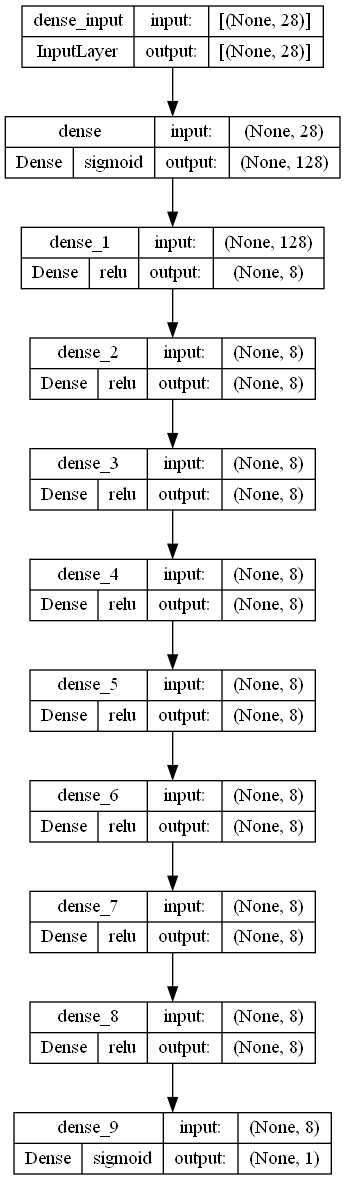

In [133]:
tf.keras.utils.plot_model(tuner.get_best_models()[0],show_layer_activations=True,show_shapes=True)

# final model

In [134]:
x_in = tf.keras.layers.Input(shape=(28))
x = tf.keras.layers.Dense(104,activation='tanh')(x_in)
x = tf.keras.layers.Dense(24,activation='tanh')(x)
x = tf.keras.layers.Dense(40,activation='tanh')(x)
x = tf.keras.layers.Dense(40,activation='relu')(x)
x = tf.keras.layers.Dense(40,activation='sigmoid')(x)
x = tf.keras.layers.Dense(8,activation='relu')(x)
x = tf.keras.layers.Dense(8,activation='relu')(x)
x = tf.keras.layers.Dense(8,activation='relu')(x)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)
fmodel = Model(inputs=[x_in],outputs=[x])
fmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_10 (Dense)            (None, 104)               3016      
                                                                 
 dense_11 (Dense)            (None, 24)                2520      
                                                                 
 dense_12 (Dense)            (None, 40)                1000      
                                                                 
 dense_13 (Dense)            (None, 40)                1640      
                                                                 
 dense_14 (Dense)            (None, 40)                1640      
                                                                 
 dense_15 (Dense)            (None, 8)                 328   

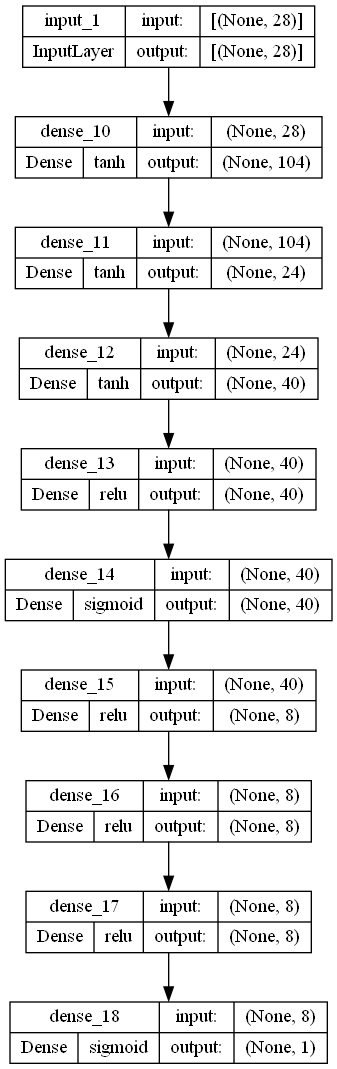

In [135]:
tf.keras.utils.plot_model(fmodel,show_shapes=True,show_layer_activations=True)

In [136]:
fmodel.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [137]:
history = fmodel.fit(xtrain,ytrain,batch_size=16,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
26/26 [==============================] - 1s 21ms/step - loss: 0.6004 - accuracy: 0.7322 - val_loss: 0.5915 - val_accuracy: 0.7157
Epoch 2/50
26/26 [==============================] - 0s 9ms/step - loss: 0.5695 - accuracy: 0.7322 - val_loss: 0.5790 - val_accuracy: 0.7157
Epoch 3/50
26/26 [==============================] - 0s 10ms/step - loss: 0.5453 - accuracy: 0.7322 - val_loss: 0.5663 - val_accuracy: 0.7157
Epoch 4/50
26/26 [==============================] - 0s 10ms/step - loss: 0.5026 - accuracy: 0.7420 - val_loss: 0.5485 - val_accuracy: 0.8039
Epoch 5/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4178 - accuracy: 0.8354 - val_loss: 0.5061 - val_accuracy: 0.8039
Epoch 6/50
26/26 [==============================] - 0s 10ms/step - loss: 0.3205 - accuracy: 0.8968 - val_loss: 0.4376 - val_accuracy: 0.8333
Epoch 7/50
26/26 [==============================] - 0s 10ms/step - loss: 0.2451 - accuracy: 0.9115 - val_loss: 0.3550 - val_accuracy: 0.8627
Epoch 8/50
26/

In [138]:
ypred = fmodel.predict(xtest)
ypred = ypred > 0.5

4/4 [==============================] - 0s 3ms/step


In [139]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.91      0.95      0.93        73

    accuracy                           0.89       102
   macro avg       0.88      0.85      0.86       102
weighted avg       0.89      0.89      0.89       102



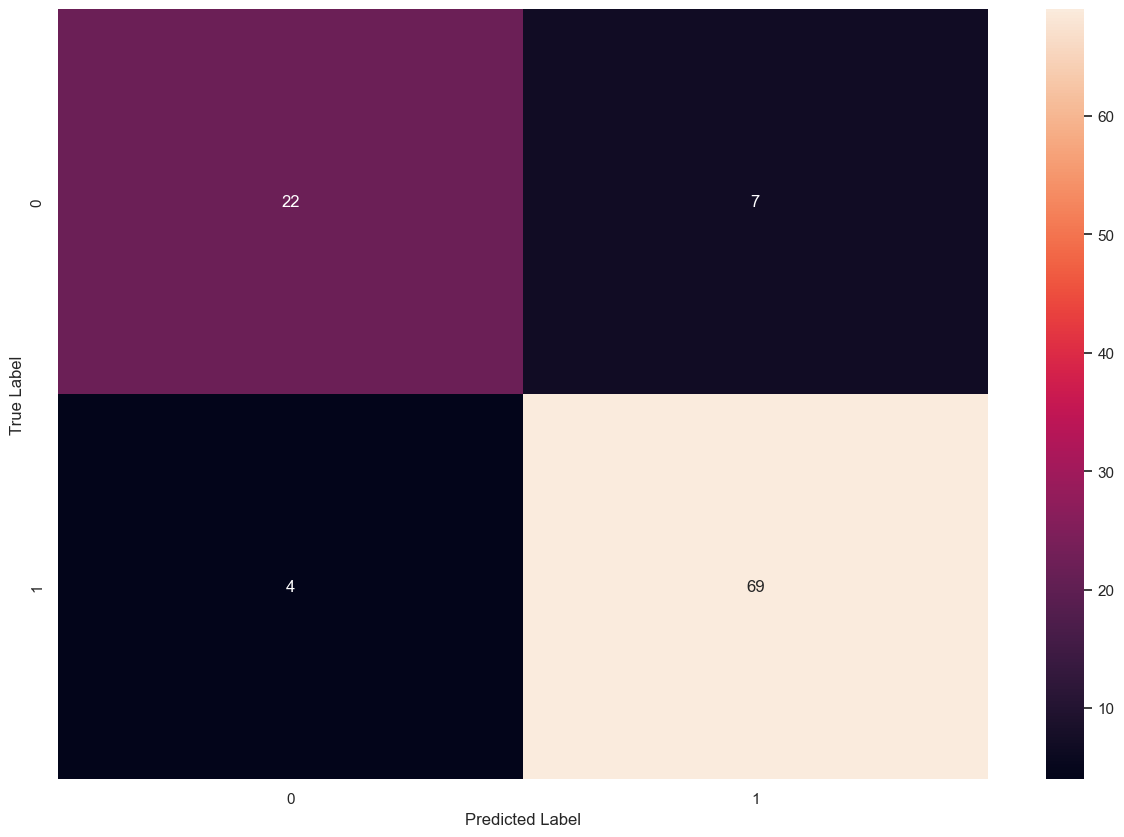

In [140]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

*Model performance improved from 79% to 92% accuracy*

In [141]:
history.history

{'loss': [0.6003718972206116,
  0.5695242285728455,
  0.5453474521636963,
  0.5025642514228821,
  0.4177898168563843,
  0.32053717970848083,
  0.24514169991016388,
  0.18164090812206268,
  0.13652773201465607,
  0.12195870280265808,
  0.12792342901229858,
  0.0653112456202507,
  0.03816213831305504,
  0.08303393423557281,
  0.07638699561357498,
  0.029984425753355026,
  0.023099832236766815,
  0.06149526685476303,
  0.10117669403553009,
  0.0639326274394989,
  0.02747936360538006,
  0.02299896627664566,
  0.025294899940490723,
  0.01998615823686123,
  0.00914688315242529,
  0.004603973589837551,
  0.0034429144579917192,
  0.0026584509760141373,
  0.0015815324150025845,
  0.0013415785506367683,
  0.0012043011374771595,
  0.0010859002359211445,
  0.0009973762789741158,
  0.0009080009767785668,
  0.0008349122363142669,
  0.0007784902700223029,
  0.0007189087336882949,
  0.0006683618412353098,
  0.0006278728833422065,
  0.0005919018876738846,
  0.0005470765754580498,
  0.000515564053785055

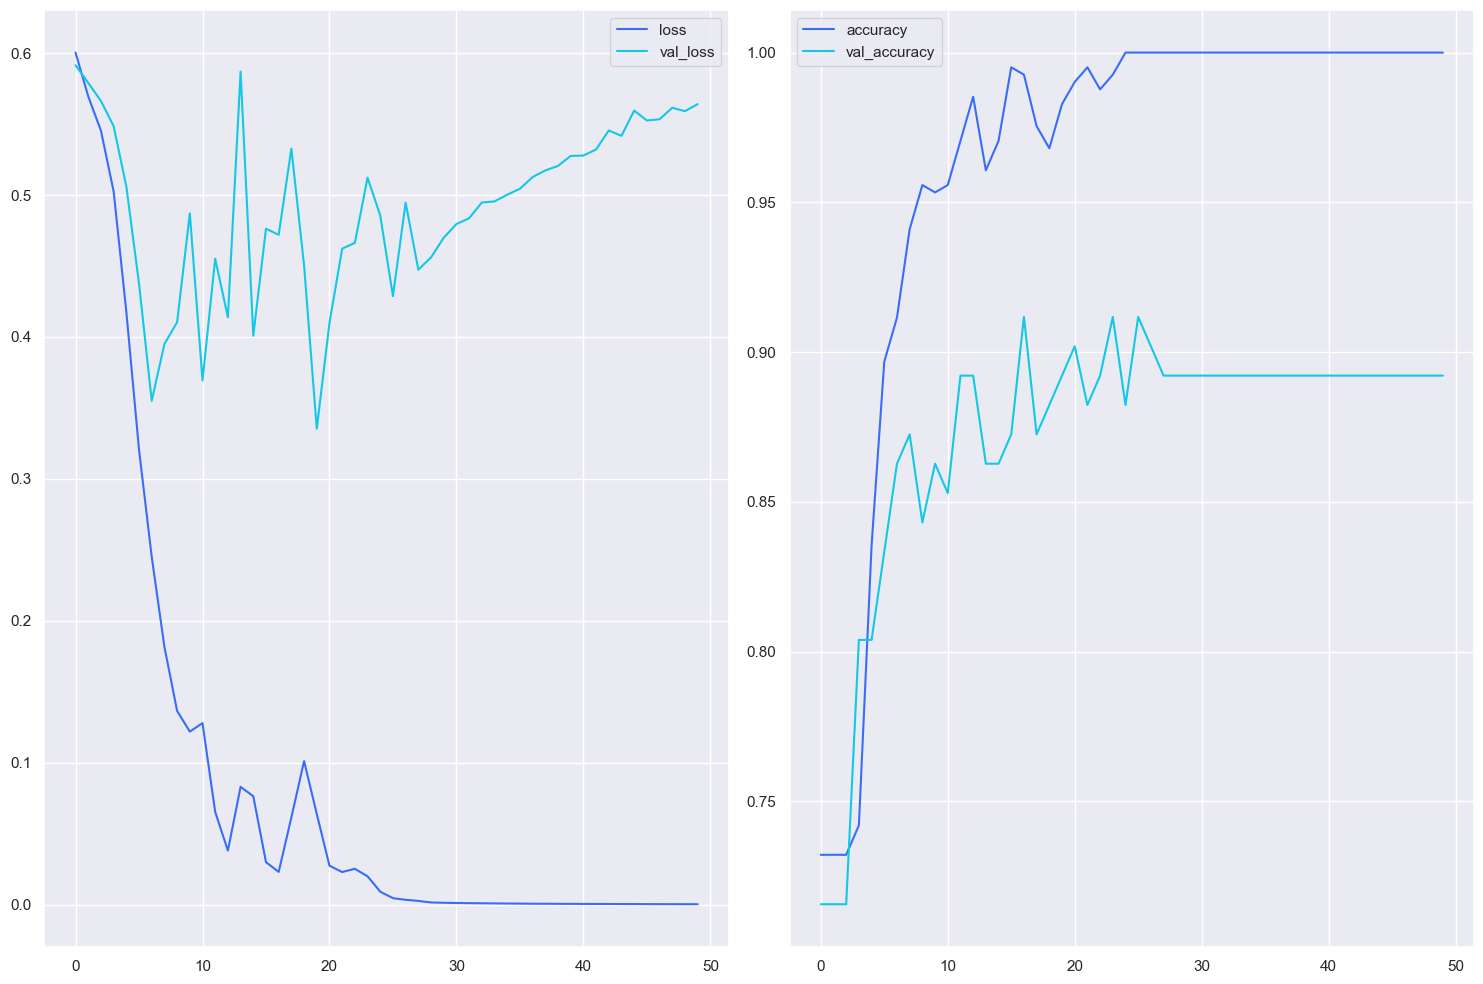

In [142]:
plot_history(history)